In [4]:
# Setting base parameters for plots
plt.rcParams.update({'figure.figsize': (14, 7), 'figure.dpi': 150})
color = sns.color_palette()[0]
# set whitegrid as default figure style
sns.set_style('whitegrid')

In [8]:
print(combined.name.value_counts()[:10])
print(f"total unique names: {combined.name.nunique()}")

None       622
Charlie     11
Oliver      10
Cooper      10
Lucy        10
Tucker       9
Penny        9
Sadie        8
Winston      8
Daisy        7
Name: name, dtype: int64
total unique names: 936


The most common dog name is Charlie, with Cooper, Lucy and Oliver tying for 2nd place. There are 936 unique dog names among the tweeted dogs (excluded the placeholder `None`)

In [9]:
print(combined.timestamp.describe())

count                    1994
unique                   1994
top       2017-01-02 13:38:42
freq                        1
first     2015-11-15 17:32:08
last      2017-08-01 12:23:56
Name: timestamp, dtype: object


The dataset contains tweets posted betweet November 15th, 2015 and August 1st, 2017.  
To better extract insights and patterns associated with date & time, I will select the tweets from 2016 and analyse them. 

In [10]:
df = combined[combined.timestamp.dt.year == 2016]

In [30]:
# create ordered list of months of the year
import datetime
months = []
for i in range(1,13):
    months.append(datetime.date(2016, i, 1).strftime('%B'))

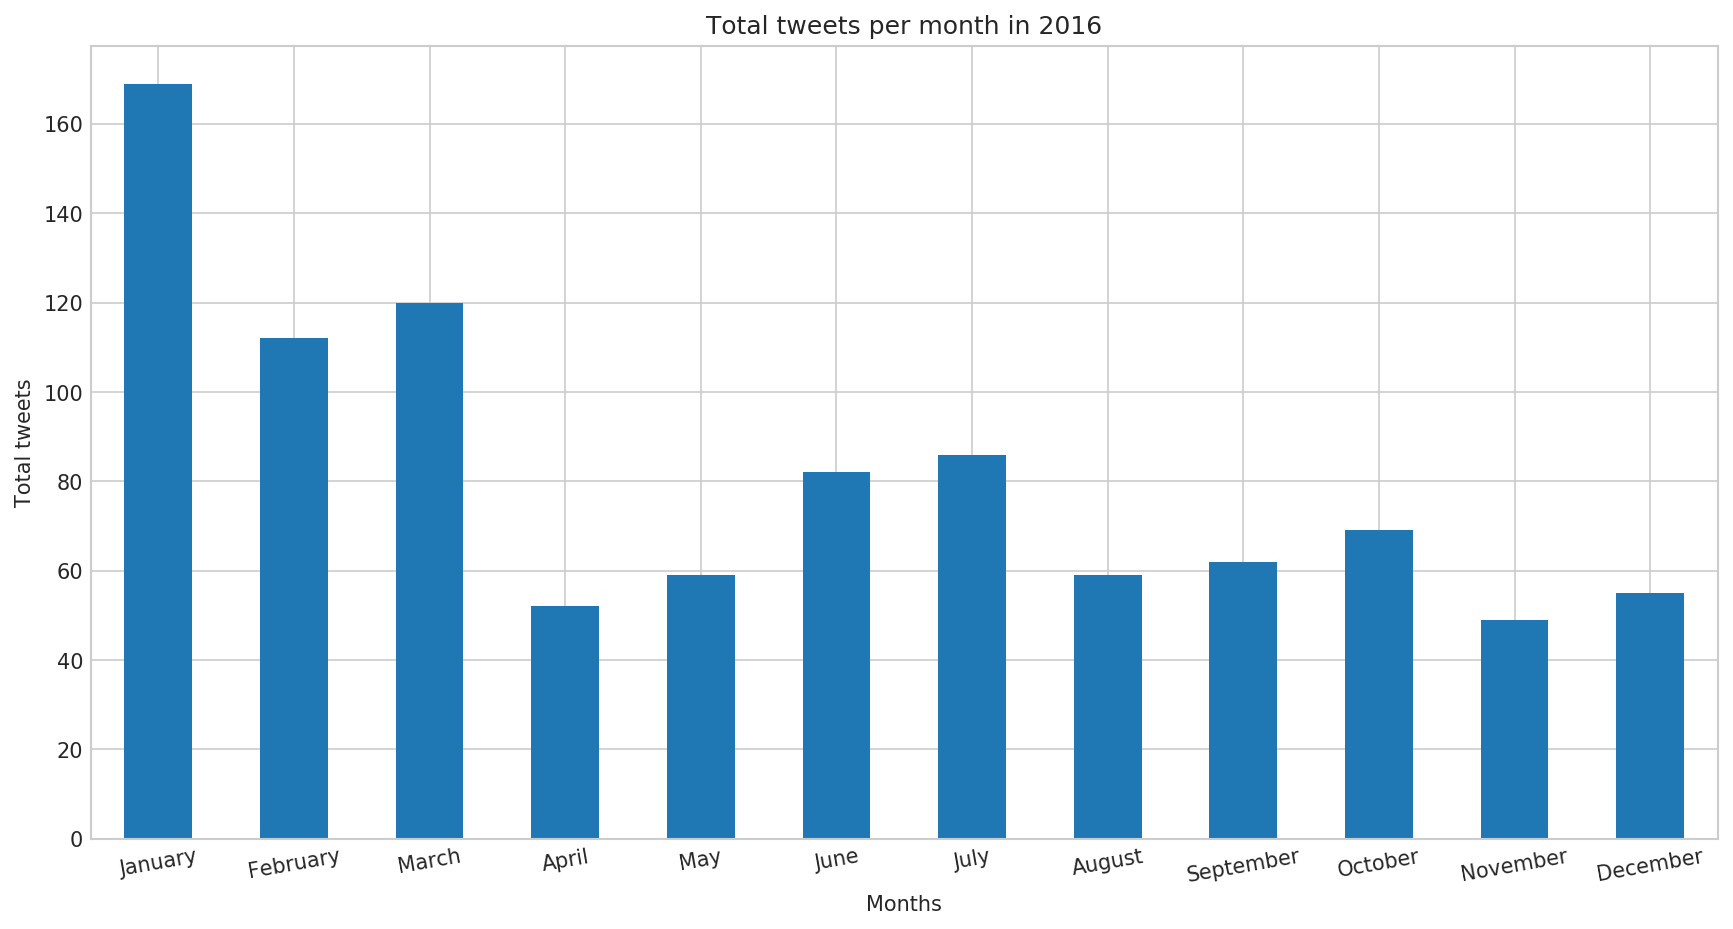

In [32]:
df.groupby(df.timestamp.dt.month).size().plot(kind="bar", color=color, title='Total tweets per month in 2016');
plt.xlabel('Months');
plt.ylabel('Total tweets');
plt.xticks(range(0,12), months, rotation=10);

In 2016, WeRateDogs tweeted the most at the start of the year and declined over the course of the year. 

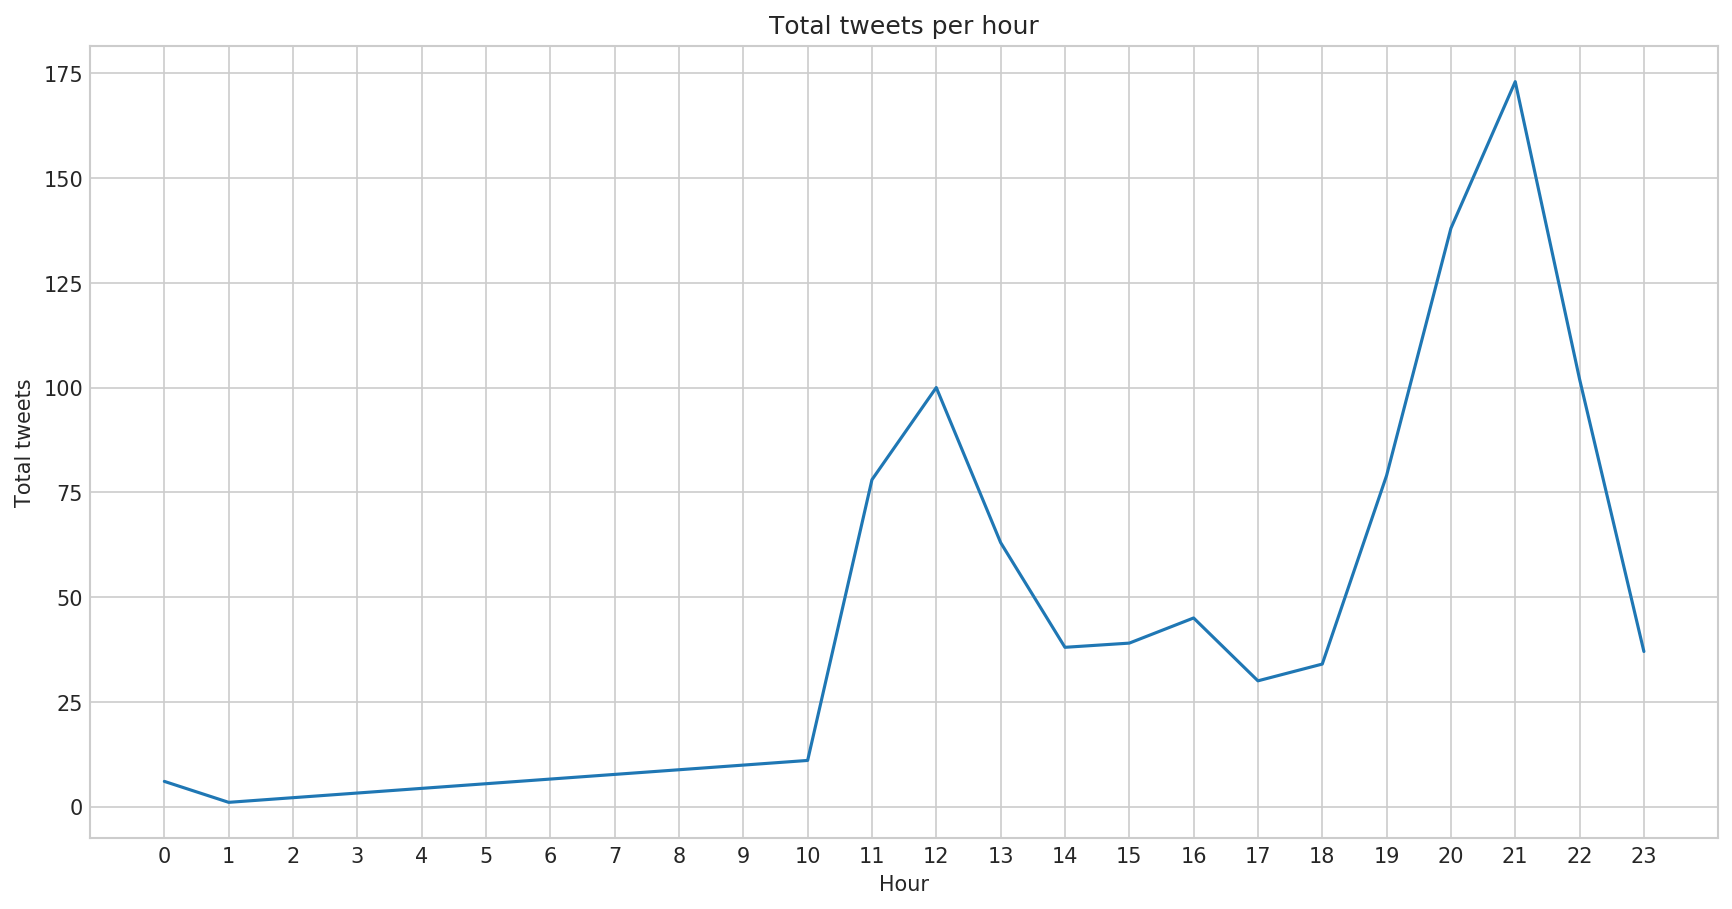

In [13]:
df.groupby(df.timestamp.dt.hour).size().plot(kind='line', color=color);
ticks = range(24)
plt.xticks(ticks, ticks);
plt.title('Total tweets per hour');
plt.xlabel('Hour');
plt.ylabel('Total tweets');

In 2016, WeRateDogs posted tweets most frequently between the hours of 10am and 11pm EST, with peak activity occuring at noon and 9pm. 

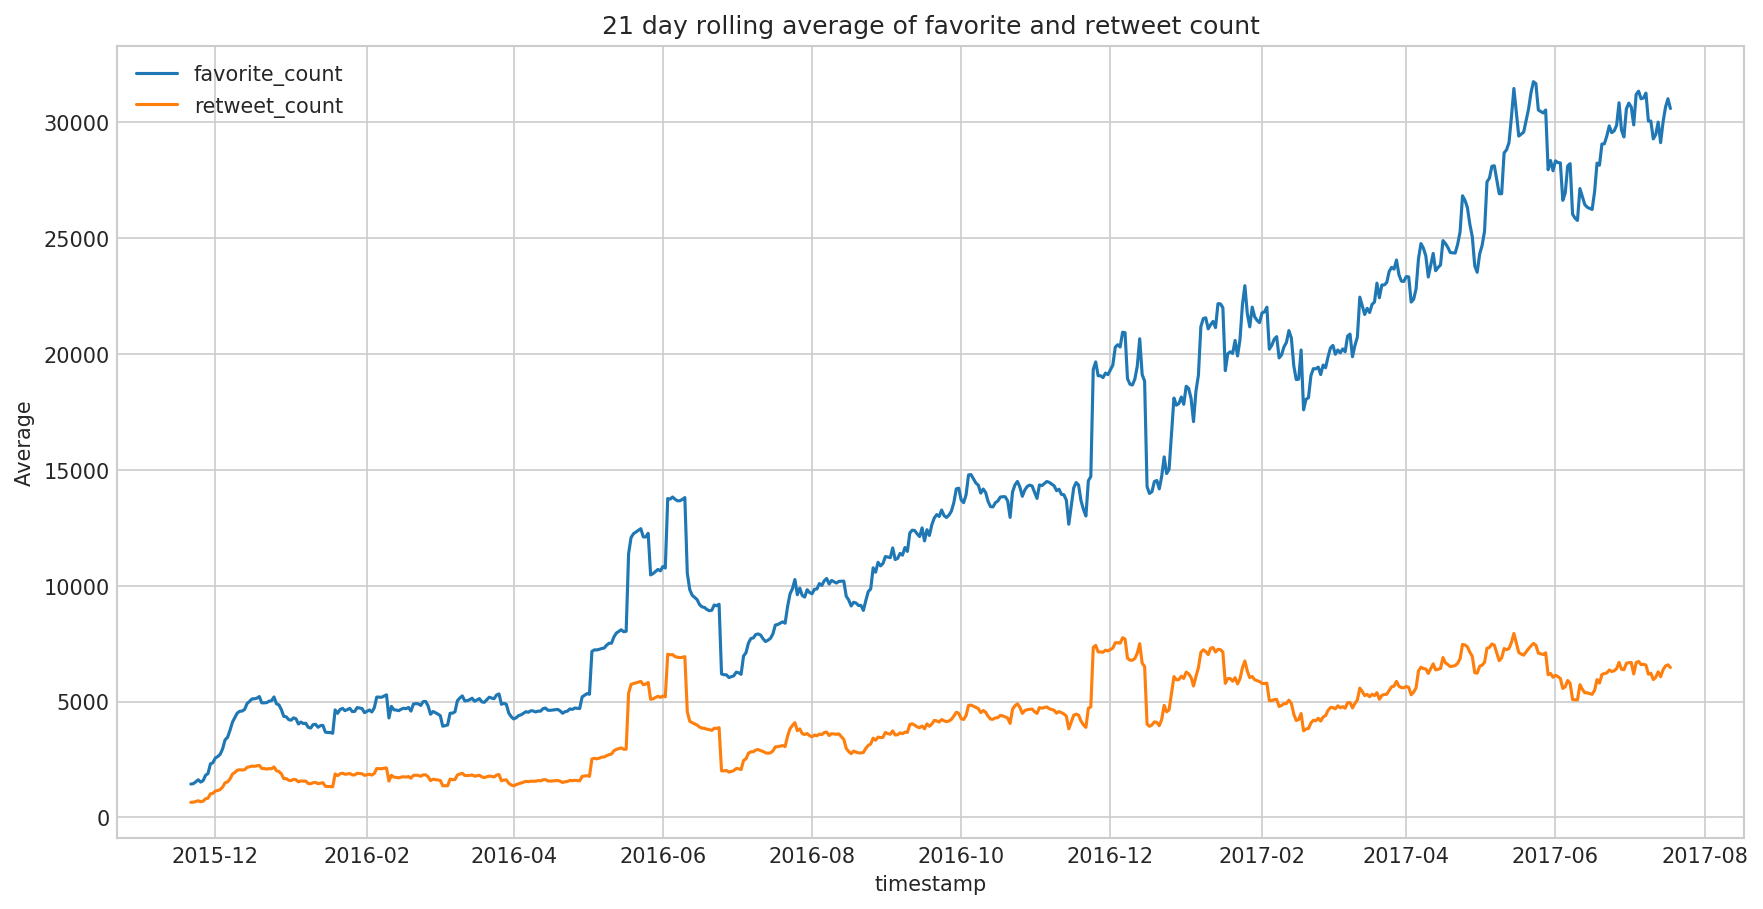

In [14]:
combined.groupby(combined.timestamp.dt.date)[['favorite_count','retweet_count']].mean().rolling(21).mean().shift(-14).plot(kind='line')
plt.title('21 day rolling average of favorite and retweet count');
plt.ylabel('Average');

For the time period covered in the dataset, overall engagement with WeRateDogs tweets had a net increase from start to end, with mean retweet count showing a slight increase and mean favorite count showing a greater overall increase. 

In [35]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

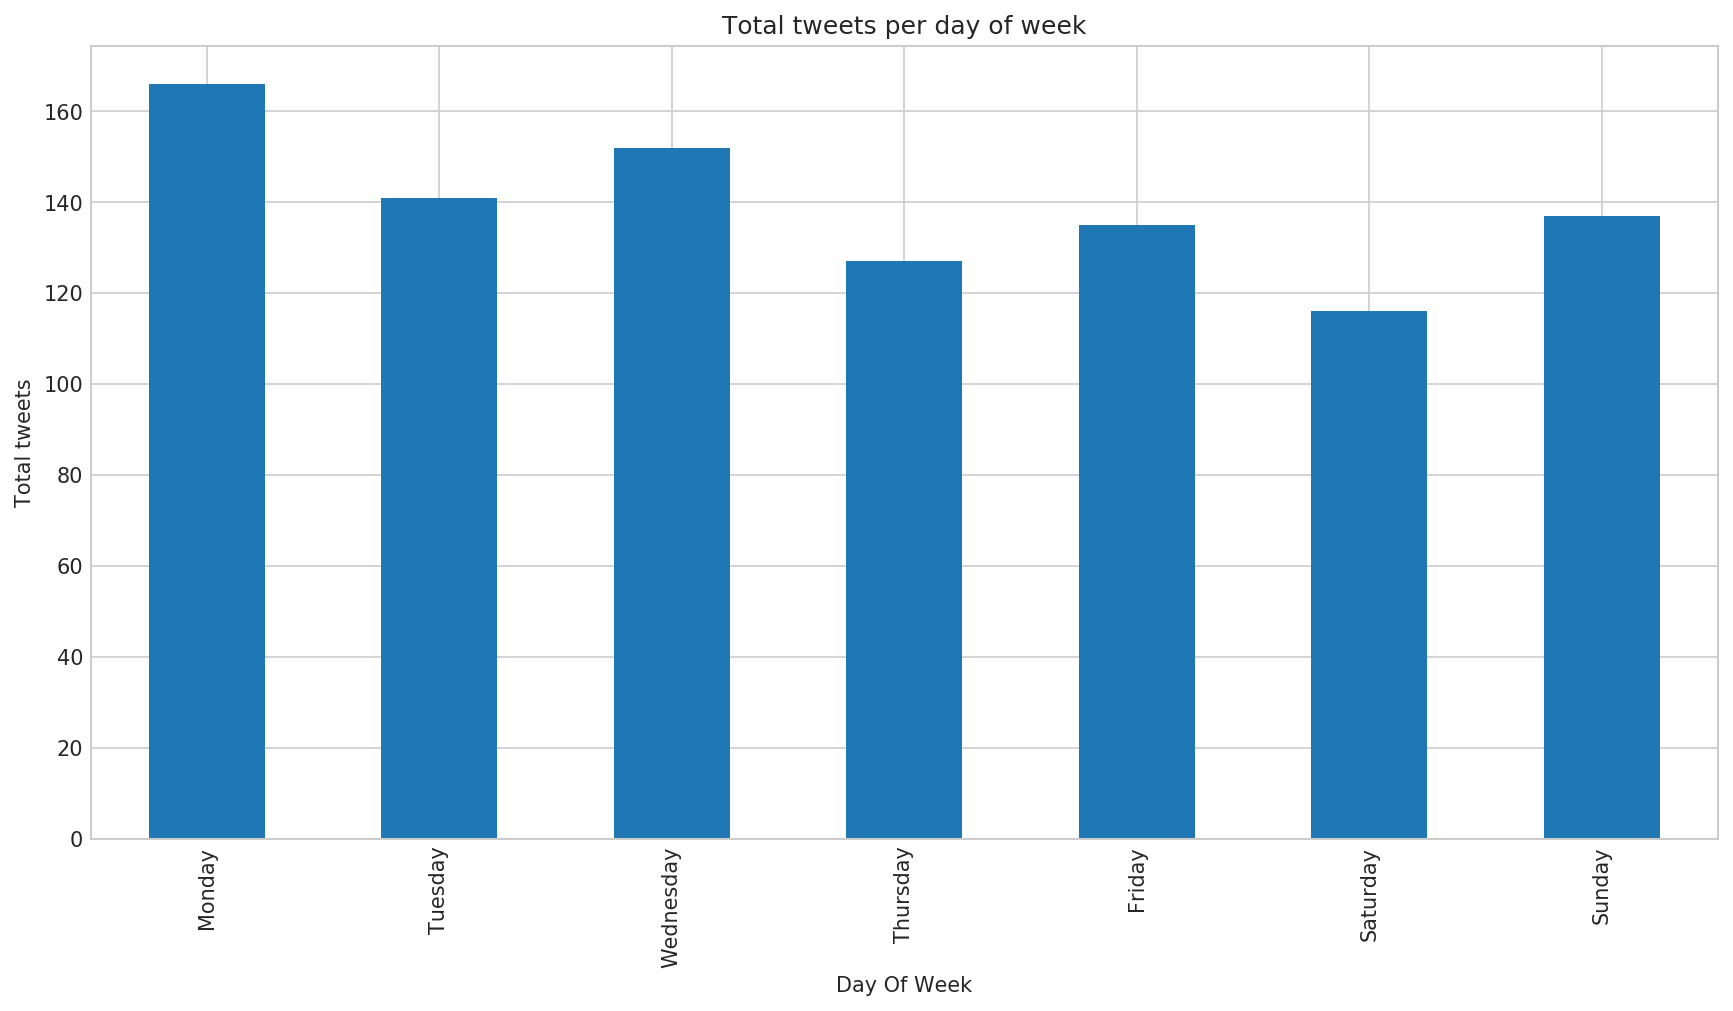

In [37]:
df.groupby(df.timestamp.dt.dayofweek).size().plot(kind='bar', color=color);
ticks = range(7)
plt.xticks(ticks, weekDays);
plt.title('Total tweets per day of week');
plt.xlabel('Day Of Week');
plt.ylabel('Total tweets');

In the year 2016, WeRateDogs tweeted the most on Mondays. 

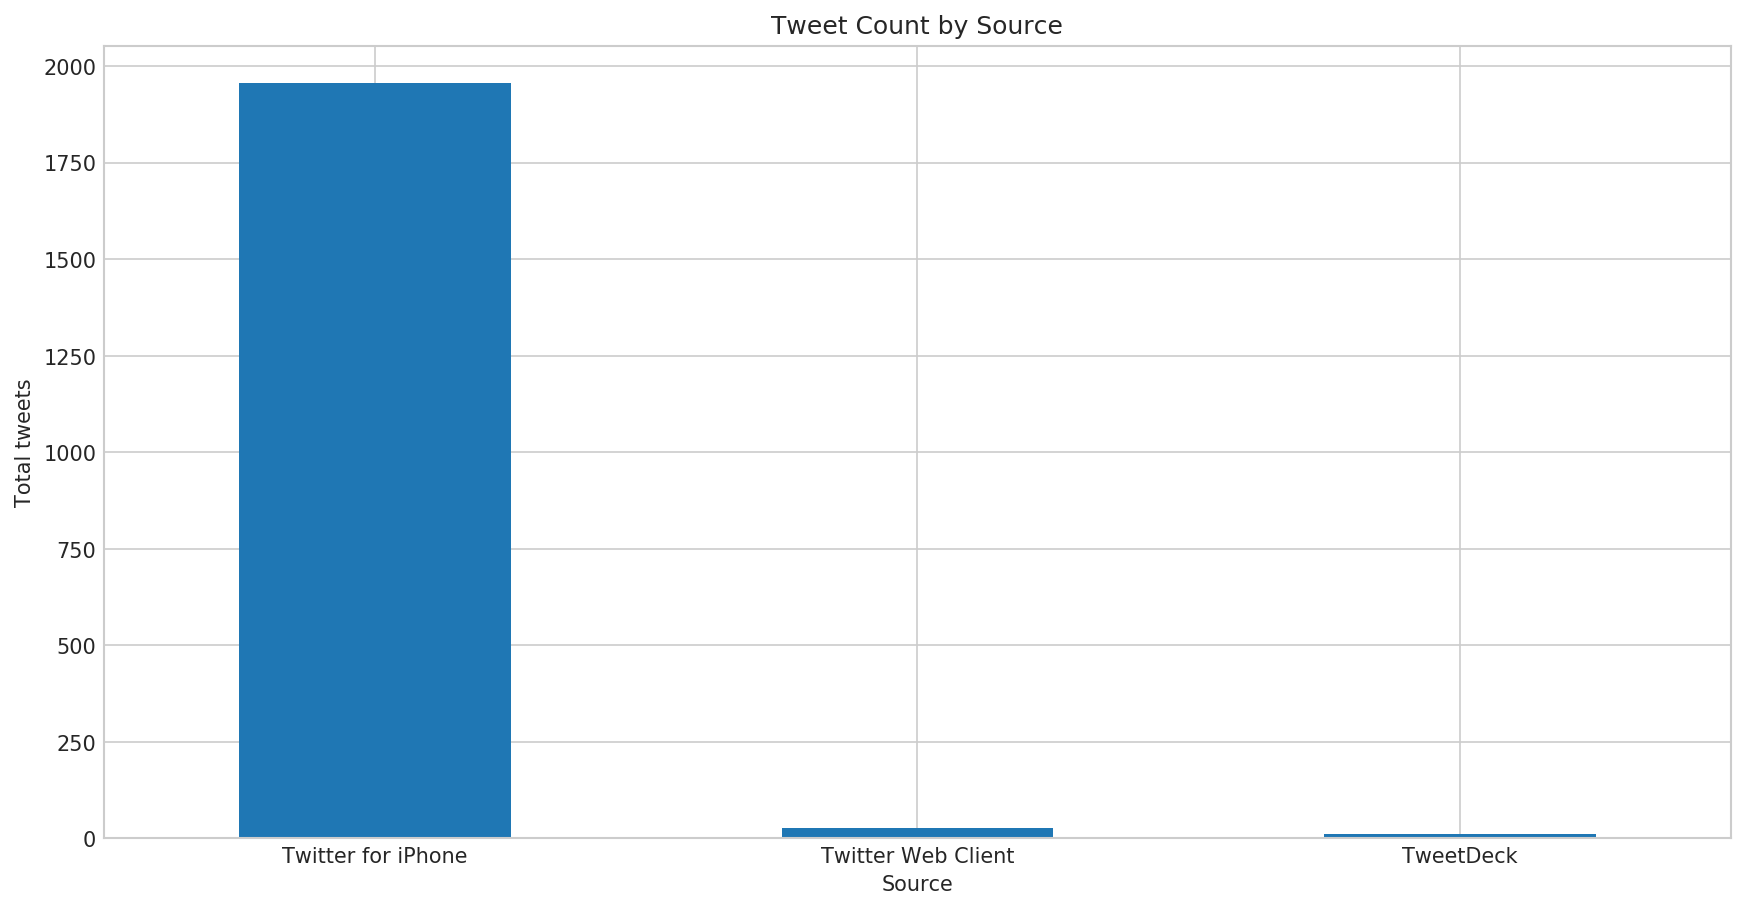

In [17]:
combined.source.value_counts().plot(kind="bar", title="Tweet Count by Source", color=color);
plt.ylabel('Total tweets');
plt.xlabel('Source');
plt.xticks(rotation=0);

From the above bar graph, we see that the WeRateDogs is mostly ran from the Twitter app on an iPhone. Twitter Web Client (accessed via browser)and tweekdeck were also used but far less often. 

In [18]:
print(f"there are {combined.likely_breed.nunique()} predicted breeds in the dataframe")

there are 113 predicted breeds in the dataframe


In [19]:
combined.likely_breed.value_counts(normalize=True)[:10]

Golden Retriever      0.093713
Labrador Retriever    0.064057
Pembroke              0.056346
Chihuahua             0.053974
Pug                   0.036773
Toy Poodle            0.030249
Chow                  0.028470
Pomeranian            0.024911
Samoyed               0.024911
Malamute              0.019573
Name: likely_breed, dtype: float64

the top 5 most predicted breeds are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Pug.

In [20]:
combined['pred_rank'].value_counts(normalize=True)

1.0    0.876038
2.0    0.087189
3.0    0.036773
Name: pred_rank, dtype: float64

87.6% had their first classification as dog, 8.7% had their second classification as dog (1st wasnt a dog) and 3.7% had their third classification as dog (first and second weren't dogs)

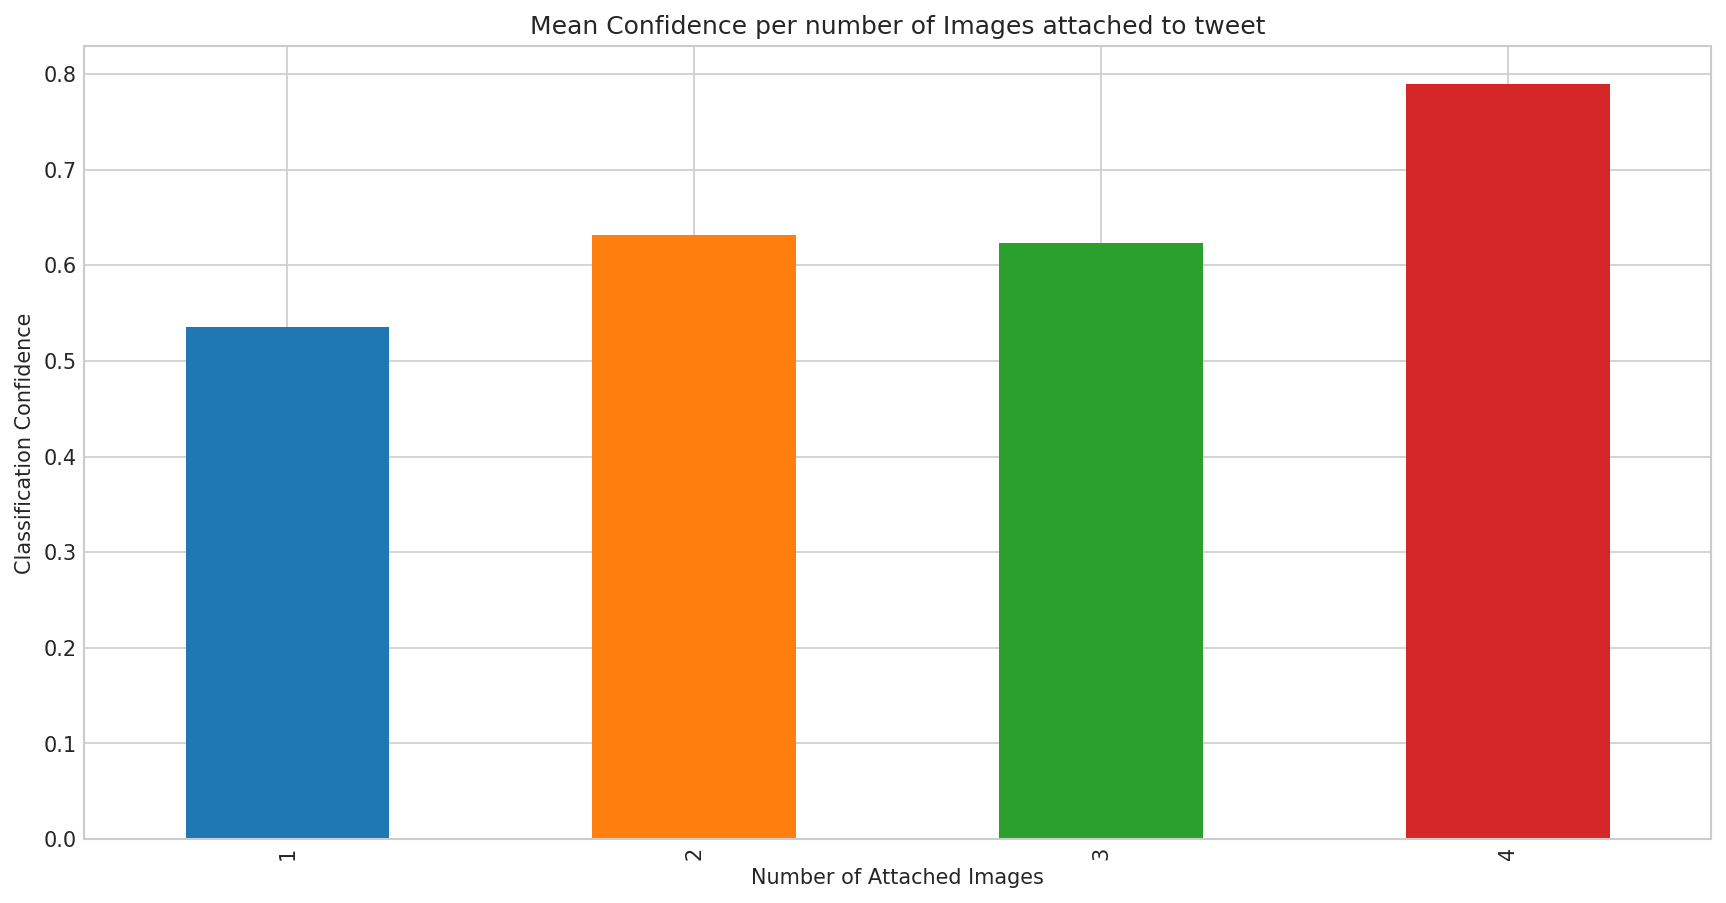

In [21]:
combined.groupby('img_num')['confidence'].mean().plot(kind='bar');
plt.xlabel('Number of Attached Images');
plt.ylabel('Classification Confidence');
plt.title('Mean Confidence per number of Images attached to tweet');

Dog breeds in tweets were classified with greater confidence if more images of the dog were attached to the tweet. 

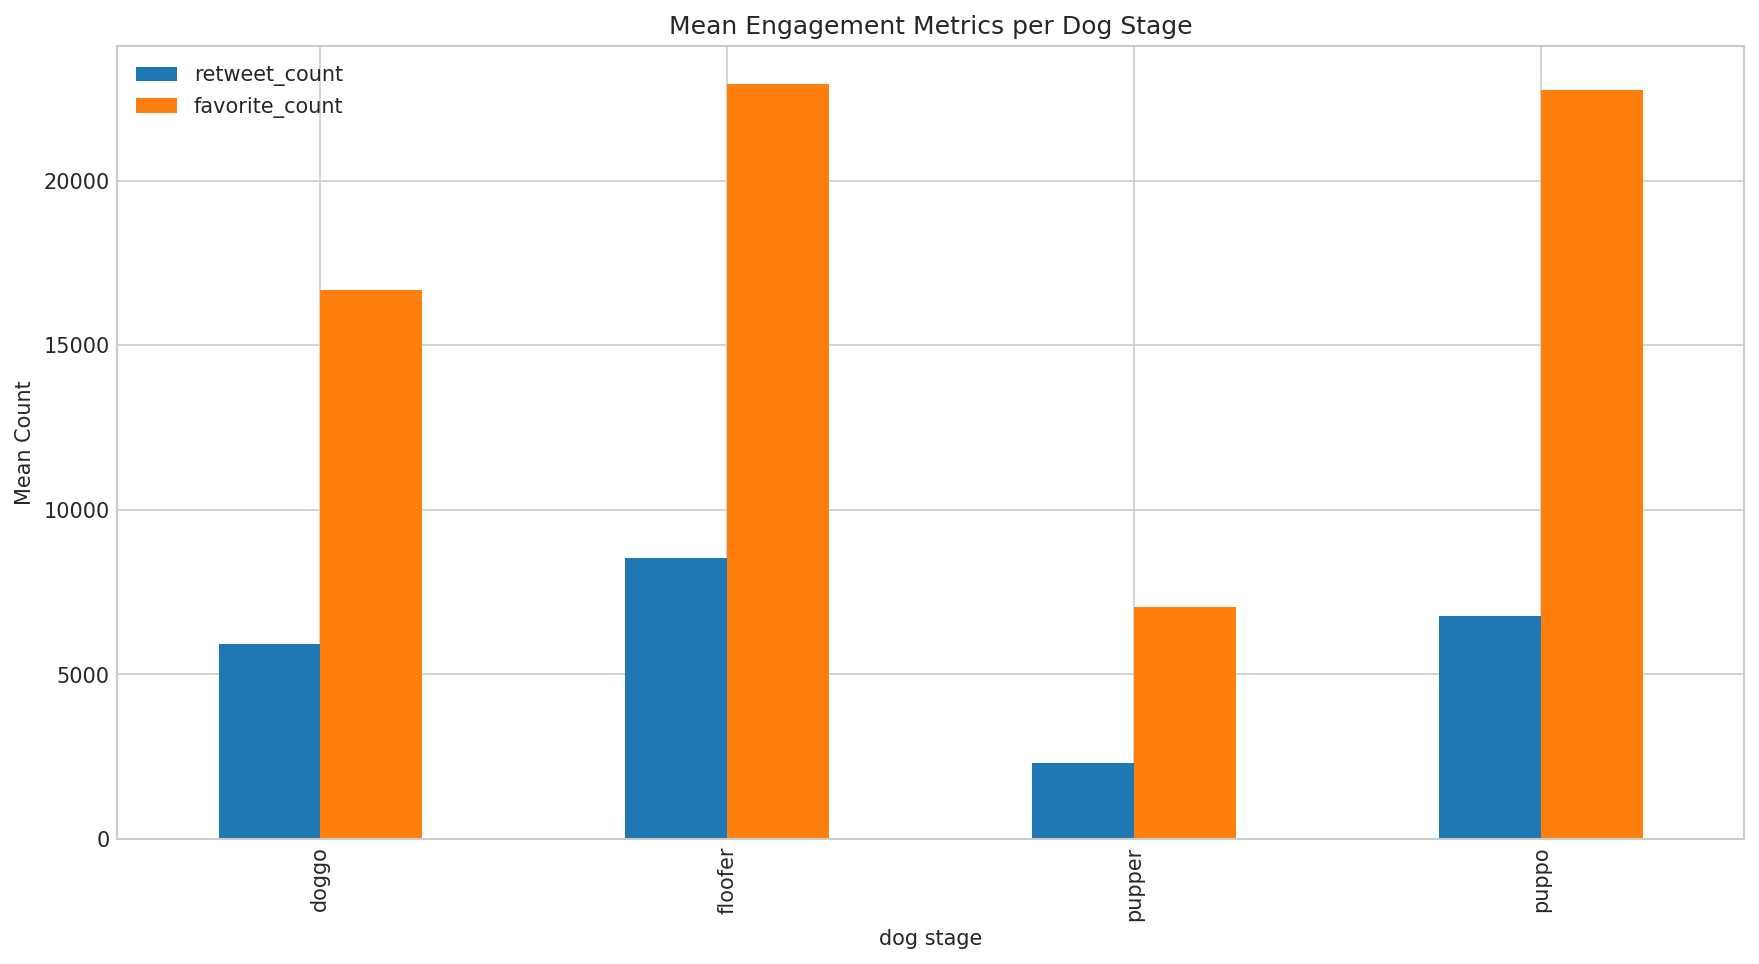

In [22]:
combined.groupby('dog_stage')[['retweet_count','favorite_count']].mean().plot(kind='bar');
plt.xlabel('dog stage');
plt.ylabel('Mean Count');
plt.title('Mean Engagement Metrics per Dog Stage');

Tweets from WeRateDogs with floofers received the most average number of likes and retweets among the dog stages, with puppers receiving the least. 

In [23]:
combined.dog_stage.value_counts(normalize=True)

pupper     0.684049
doggo      0.220859
puppo      0.085890
floofer    0.009202
Name: dog_stage, dtype: float64

In [24]:
combined.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      14.305556
floofer    12.666667
pupper     12.995516
puppo      12.142857
Name: rating_numerator, dtype: float64

From the 2 tables above, we see that whereas puppers are the most populous in the dataset, doggos tend to have a higher rating

In [25]:
combined.groupby('dog_stage')['likely_breed'].size()

dog_stage
doggo       72
floofer      3
pupper     223
puppo       28
Name: likely_breed, dtype: int64

Assuming the neural network used to classify the images was highly accurate, the above summary shows that the dog stage with the greatest predicted variety of breeds is pupper (223 breeds) as opposed to floofer (3 breeds)

In [26]:
combined.groupby('likely_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10]

likely_breed
Clumber                        27.000000
Soft-Coated Wheaten Terrier    20.800000
West Highland White Terrier    14.687500
Great Pyrenees                 14.666667
Chow                           14.166667
Labrador Retriever             13.638889
Borzoi                         13.545455
Siberian Husky                 13.250000
Golden Retriever               13.000000
Bouvier Des Flandres           13.000000
Name: rating_numerator, dtype: float64

In [27]:
combined.groupby('likely_breed')['favorite_count'].mean().sort_values(ascending=False)[:10]

likely_breed
Saluki                     24060.000000
Bedlington Terrier         21153.166667
French Bulldog             18416.806452
Bouvier Des Flandres       18032.000000
Afghan Hound               17326.666667
Black-And-Tan Coonhound    17012.000000
Flat-Coated Retriever      16791.625000
Irish Water Spaniel        16400.000000
Leonberg                   14934.333333
English Springer           14138.300000
Name: favorite_count, dtype: float64

In descending order, the classified dog breed with the highest associated rating numerators are Clumber, Soft-Coated Wheaten Terrier and West Highland White terrier with 27, 20.8 and 14.7 respectfully. The 3 breeds with the highest average favorite count are Saluki, Bedlington Terrier and French Bulldog. 

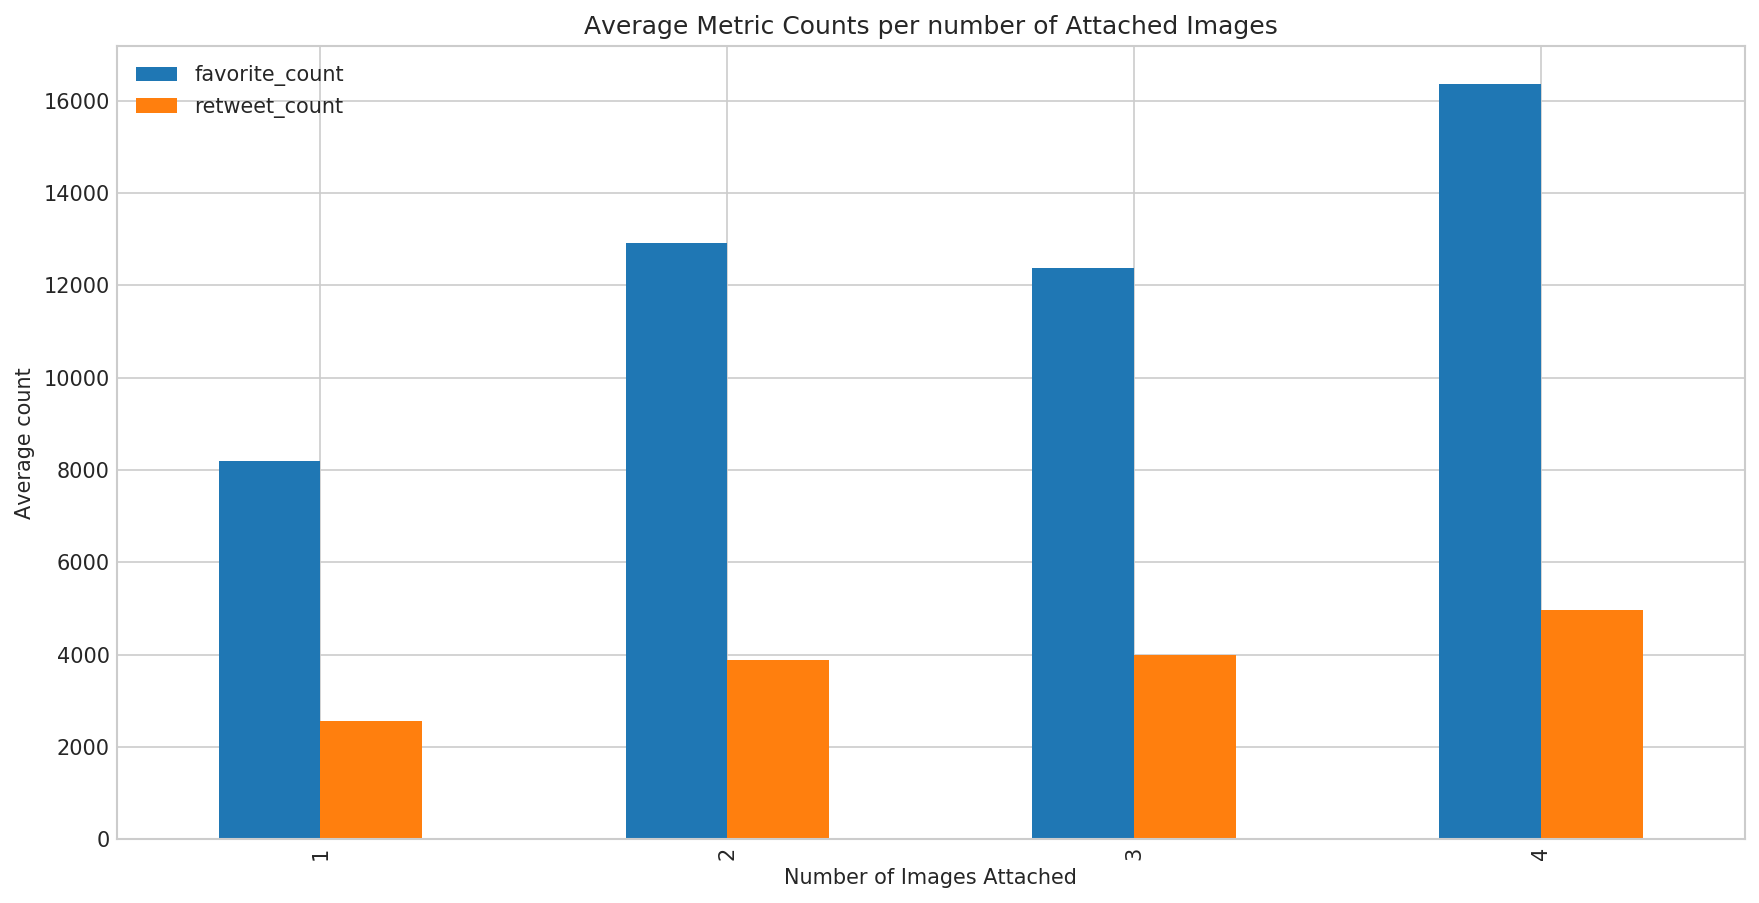

In [28]:
combined.groupby('img_num')[['favorite_count','retweet_count']].mean().plot(kind='bar');
plt.xlabel('Number of Images Attached');
plt.ylabel('Average count');
plt.title('Average Metric Counts per number of Attached Images');

On average, tweets with more attached images received more engagement in the form of likes and retweets. 